In [ ]:
import pandas as pd

df = pd.read_csv("hotel_bookings.csv")

# تبدیل 'NULL'ها (اگر به صورت رشته ذخیره شده‌اند) به NaN واقعی
df = df.replace('NULL', pd.NA)

# پر کردن مقادیر گمشده عددی با صفر (ساده‌ترین راهکار)
df['children'] = df['children'].fillna(0)
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# حذف ستون‌هایی که داده‌های زیادی از دست رفته دارند یا در این مرحله لازم نیستند
df = df.drop(['company', 'agent', 'reservation_status', 'reservation_status_date'], axis=1)

# حذف سطرهایی که هنوز داده گمشده‌ای دارند (مثلاً در Country)
df = df.dropna()

In [ ]:
# لیست ستون‌های طبقه‌بندی (که باید به 0 و 1 تبدیل شوند)
categorical_features = [
    'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type','arrival_date_month'
]

# اعمال One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# حالا تمام ستون‌های متنی به ستون‌های 0 و 1 تبدیل شده‌اند.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# متغیر هدف: 'is_canceled'
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1) 
# n_jobs=-1 از تمام هسته‌های CPU استفاده می‌کند و سرعت را بالا می‌برد.

model_rf.fit(X_train, y_train)

# ارزیابی
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Random Forest (After Preprocessing): {accuracy * 100:.2f}%")

In [ ]:
# نمایش اهمیت ویژگی‌ها
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- 5 Feature Importances ---")
print(feature_importances.head(5))

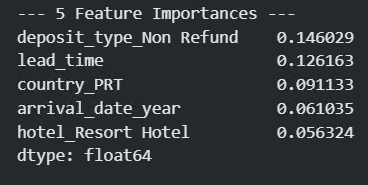